## Solar Stations statistics

This page presents statisitcs on solar stations using the data from solarstations.org

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from datetime import datetime as dt

In [2]:
path = 'https://solarstations.org/_downloads/f85f41dda48ab008055bbfad91e578b2/SolarStationsOrg-station-catalog.csv'
df = pd.read_csv(path)

In [4]:
dfs = df[['Station full name','Time period']]
dfs.index = dfs['Station full name']
dfs = dfs.drop(columns=['Station full name'])

# make different colors based on stations status
dfs['color'] = 'red'
dfs['color'] = dfs['color'].mask(dfs['Time period'].str.endswith('-'), 'green').mask(dfs['Time period'].str.endswith('?'), 'blue')

# Drop stations with unknown time period ('?' or '')
dfs = dfs.loc[~dfs['Time period'].isin(['?', '']), :]

# define start operation period
dfs['start'] = dfs['Time period'].str[:4].astype(int)

# Drop stations with only one year of data
dfs = dfs.loc[~(dfs['Time period'] == dfs['start'].astype(str)), :]

# define end operation period
dfs['end'] = dfs['Time period'].str[4:]
dfs['end'] = dfs['Time period'].str[5:].mask(dfs['Time period'].str.endswith('-'), dt.now().year).mask(dfs['Time period'].str.endswith('-?'), dt.now().year).mask(dfs['Time period'].str.endswith('-?'), dt.now().year)
dfs['end'] = dfs['end'].astype(int)

# sort the dataframe based on the start operation date and station status (color)
dfs = dfs.sort_values(['start','color'], ascending=False)

dfs = dfs.reset_index()

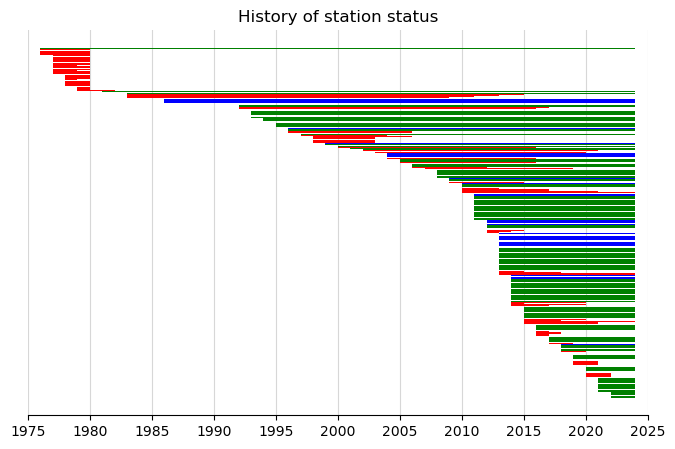

In [25]:
fig, axes = plt.subplots(figsize=(8, 5))
axes.barh(dfs.index, dfs['end']-dfs['start'], left=dfs['start'], color=dfs['color'], zorder=2)
axes.set_yticks([])
axes.set_title('History of station status')
axes.set_xticks(np.arange(1970,dt.today().year+5,5))
axes.set_xlim(1975,dt.today().year+1)
axes.grid(alpha=0.5, zorder=-1)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['left'].set_visible(False)
#plt.figtext(0.5, 0.01, 'Figure: ', wrap=True, horizontalalignment='center', fontsize=9);

(0.0, 100.0)

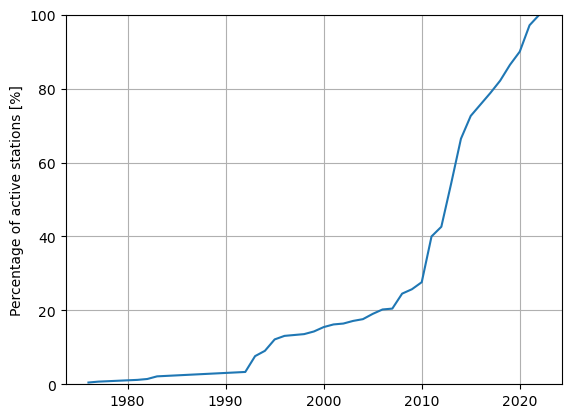

In [5]:
active_stations_count = dfs.loc[dfs['color']=='green', 'start'].value_counts().sort_index()

fig, axes = plt.subplots()
axes.plot(active_stations_count.cumsum().divide(active_stations_count.sum()).multiply(100))
axes.set_ylabel('Percentage of active stations [%]')
axes.grid()
axes.set_ylim(0, 100)

In [78]:
a = dfs.loc[dfs['color']=='green']
year = 1993
stations_before_year = len(a.loc[a['start']<year])
percent_before_year = round(1-(len(a)-len(a.loc[a['start']<year]))/len(a),3)*100
total_active = len(a)

In [80]:
from IPython.display import Markdown as md
fr=2 #GHz



f_r = 2 GHz

In [81]:
#print('80% of the active stations were set up in the last 20 years.')
#print(f'Only {stations_before_year} stations out of {total_active} have been in operation before {year} (~{round(percent_before_year,0)}%)')
md(f'Only {stations_before_year} stations out of {total_active} have been in operation before {year} (~{round(percent_before_year,0)}%)')

Only 14 stations out of 420 have been in operation before 1993 (~3.0%)

# Historical and active stations

Text(0.5, 0, '')

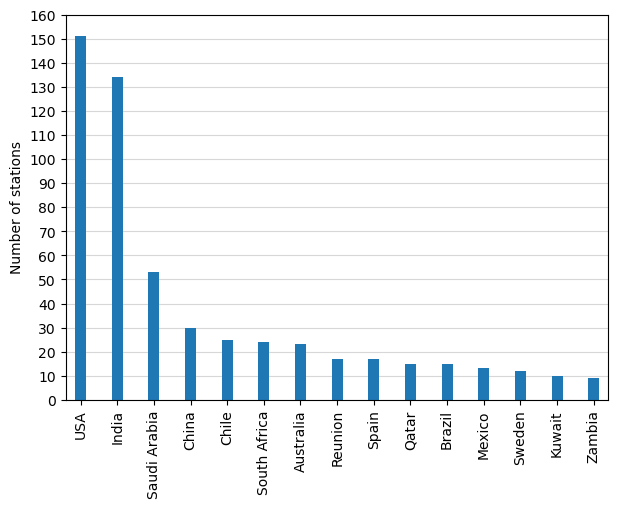

In [8]:
# Top 15 countries
countries = df.groupby('Country').count()['Station full name'].sort_values(ascending=False)[:15]
# Plot
fig, axes = plt.subplots(figsize=(7,5))
countries.plot.bar(zorder=2, width=0.3)
axes.set_ylabel('Number of stations')
axes.set_ylim(0, countries[0]+5)
axes.set_yticks(np.arange(0,countries[0]+10,10))
axes.grid(alpha=0.5, which='both', axis='y', zorder=-1)
axes.set_xlabel('')

In [9]:
print('List of historical and active networks:')
df['Network'].str.replace(' ','').str.split(';', expand=True).stack().value_counts()

List of historical and active networks:


SRRA                                                    123
ESMAP                                                    89
BSRN                                                     79
WEST                                                     52
NOAA                                                     39
IOS-net                                                  26
SAURAN                                                   22
WMORRC                                                   17
BOM                                                      15
QEERI                                                    15
SONDA                                                    14
AEMET                                                    14
FONDEF                                                   13
WMOGAW                                                   12
SMHI                                                     12
enerMENA                                                 10
SURFRAD                                 

Text(0.5, 0, '')

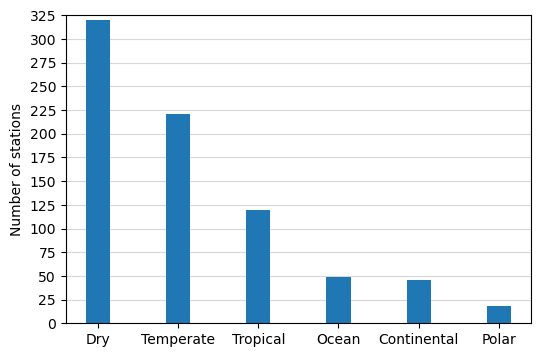

In [10]:
# Stations per KG climate zone
climate_zone = df.groupby('Koeppen Geiger climate zone').count()['Station full name'].sort_values(ascending=False)
# plot
fig, axes = plt.subplots(figsize=(6,4))
climate_zone.plot.bar(zorder=2, width=0.3, rot=0)
axes.set_ylim(0, climate_zone[0]+5)
axes.set_yticks(np.arange(0,climate_zone[0]+25,25))
axes.grid(alpha=0.5, which='both', axis='y', zorder=-1)
axes.set_ylabel('Number of stations')
axes.set_xlabel('')

# Only active stations

In [11]:
# create a column indicating if a station is active
df['Active'] = df['Time period'].str.endswith('-')
# create a new dataframe containing only the active stations

# REMOVE THE ==True WHEN THERE ARE NO NAN VALUES
dfa = df.loc[df['Active']==True]
print(f'The number of active stations is: {len(dfa)}')

The number of active stations is: 420


Text(0.5, 1.0, 'Top 5 countries')

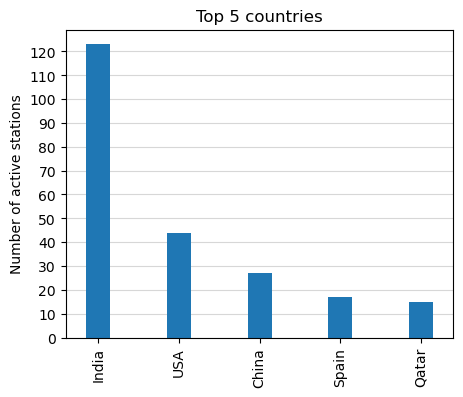

In [12]:
# Top 5 active station countries
countries_active = dfa.groupby('Country').count()['Station full name'].sort_values(ascending=False)[:5]
# plot
fig, axes = plt.subplots(figsize=(5,4))
countries_active.plot.bar(zorder=2, width=0.3, rot=90)
axes.set_yticks(np.arange(0,countries_active[0]+5,10))
axes.grid(alpha=0.5, which='both', axis='y', zorder=-1)
axes.set_ylabel('Number of active stations')
axes.set_xlabel('')
axes.set_title('Top 5 countries')

Text(0.5, 1.0, 'Station Tier')

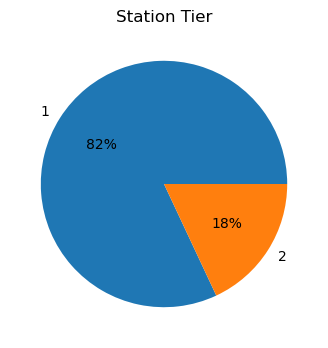

In [13]:
# Station Tier
fig, axes = plt.subplots(figsize=(4,4))
dfa['Tier'].convert_dtypes().value_counts().plot.pie(autopct='%1.0f%%')
axes.set_ylabel('')
axes.set_title('Station Tier')

In [14]:
print('List of active networks:')
dfa['Network'].str.replace(' ','').str.split(';', expand=True).stack().value_counts()

List of active networks:


SRRA        123
ESMAP        63
BSRN         60
IOS-net      15
QEERI        15
AEMET        14
enerMENA     10
WMORRC       10
WMOGAW        8
SURFRAD       7
SOLRAD        7
SRML          7
CBSRN         7
DOERTC        5
ARAD          5
SMN           5
SONDA         4
ABO           4
NRELMIDC      3
ARM           3
SMHI          3
IDMP          1
dtype: int64

In [15]:
df['Unknown_status'] = list(map(lambda x: str(x).endswith('?'), df['Time period']))
dfu = df.loc[df['Unknown_status']]

print(f'The number of unknown status stations is: {len(dfu)}')

The number of unknown status stations is: 111


### Active stations that have data freely available

In [16]:
df_un = dfa[(dfa['Data availability'].isna()) | (dfa['Data availability']=='Not available')]
df_av = dfa[(dfa['Data availability']=='Freely') | (dfa['Data availability']=='Free')]
df_req = dfa[dfa['Data availability']=='Upon request']

print(f'The number of active stations with available data is: {len(df_av)} and the one for unavailable is: {len(df_un)}')

The number of active stations with available data is: 207 and the one for unavailable is: 179


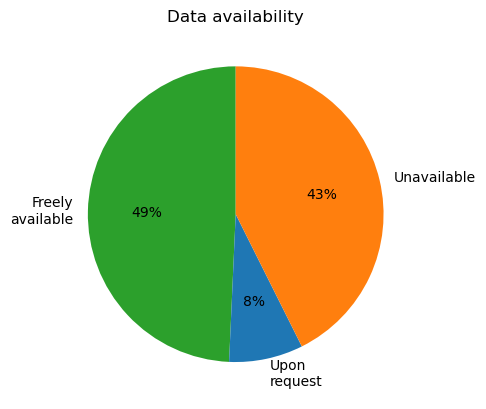

In [17]:
fig, axes = plt.subplots()

axes.pie([len(df_av), len(df_req), len(df_un)], labels=['Freely\navailable','Upon\nrequest','Unavailable'], 
         colors=['C2','C0','C1'], autopct='%1.0f%%', startangle=90)
axes.set_title('Data availability');

### Active stations per continent

In [18]:
continents = dfa.groupby('Continent').count().sort_values(by='Continent')['Station full name']
continents

Continent
Africa            59
Antarctica         6
Asia             209
Europe            55
North America     60
Oceania            9
South America     16
Name: Station full name, dtype: int64

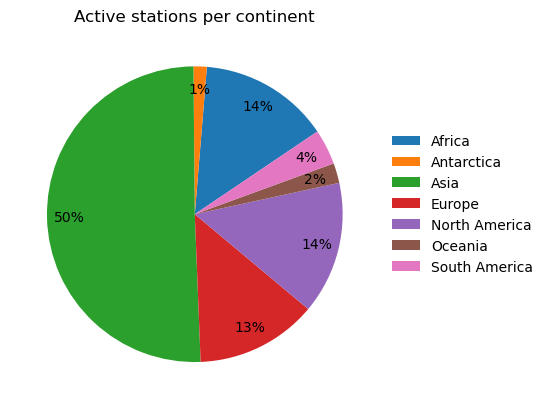

In [19]:
fig, axes = plt.subplots()

pie = axes.pie(continents, autopct='%1.0f%%', pctdistance=0.85, startangle=34)
axes.legend(continents.index, loc=2, bbox_to_anchor=(1,0.75), frameon=False)
axes.set_title('Active stations per continent');

In [20]:
# land areas of contients per km^2 from Wikipedia
continent_area={
    'Asia':44614000,
    'Africa':30365000,
    'North America':24230000,
    'South America':17814000,
    'Antarctica':14200000,
    'Europe':10000000,
    'Oceania':8510926
   }

In [21]:
station_per_km = pd.Series(dtype='float64')

for i in continents.index:
    station_per_km[i] = continents[i]/continent_area[i]*1000000 # this is stations per Tm^2

Text(0.5, 1.0, 'Stations per Tm$^2$ per continent')

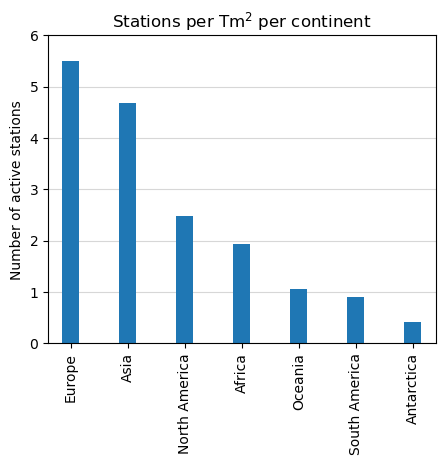

In [22]:
fig, axes = plt.subplots(figsize=(5,4))
station_per_km.sort_values(ascending=False).plot.bar(zorder=2, width=0.3, rot=90)
axes.set_yticks(np.arange(0,station_per_km.sort_values(ascending=False)[0]+1,1))
axes.grid(alpha=0.5, which='both', axis='y', zorder=-1)
axes.set_ylabel('Number of active stations')
axes.set_xlabel('')
axes.set_title('Stations per Tm$^2$ per continent')

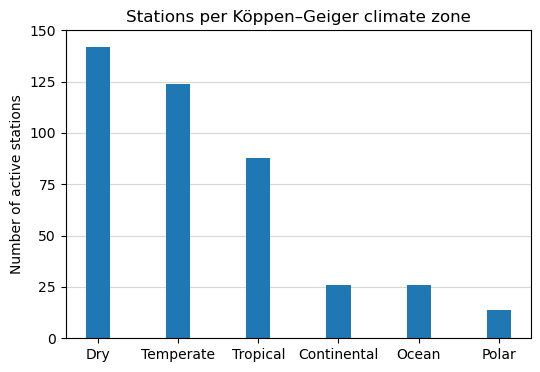

In [84]:
# Stations per KG climate zone
climate_zone = dfa.groupby('Koeppen Geiger climate zone').count()['Station full name'].sort_values(ascending=False)
# plot
fig, axes = plt.subplots(figsize=(6,4))
climate_zone.plot.bar(zorder=2, width=0.3, rot=0)
axes.set_ylim(0, climate_zone[0]+5)
axes.set_yticks(np.arange(0,climate_zone[0]+25,25))
axes.grid(alpha=0.5, which='both', axis='y', zorder=-1)
axes.set_ylabel('Number of active stations')
axes.set_xlabel('')
axes.set_title('Stations per Köppen–Geiger climate zone');

### Active stations and altitude

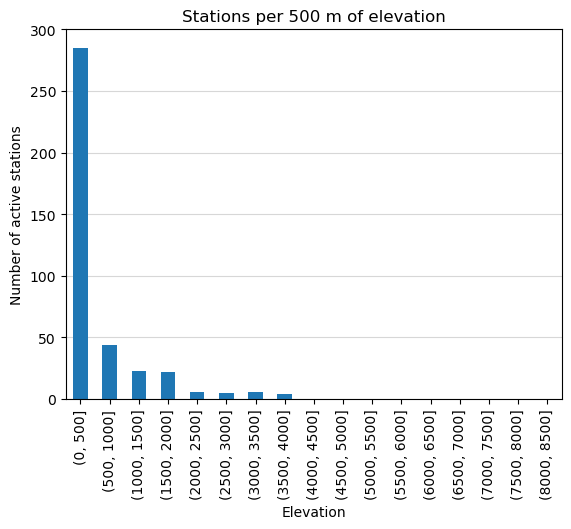

In [72]:
stations_per_500m = dfa.groupby(pd.cut(dfa['Elevation'], np.arange(0, 9000, 500)))['Station full name'].count()

fig, axes = plt.subplots()
stations_per_500m.plot.bar(zorder=2)
axes.set_yticks(np.arange(0,stations_per_500m[1]+50,50))
axes.grid(alpha=0.5, which='both', axis='y', zorder=-1)
axes.set_ylabel('Number of active stations')
axes.set_title('Stations per 500 m of elevation');

### Components

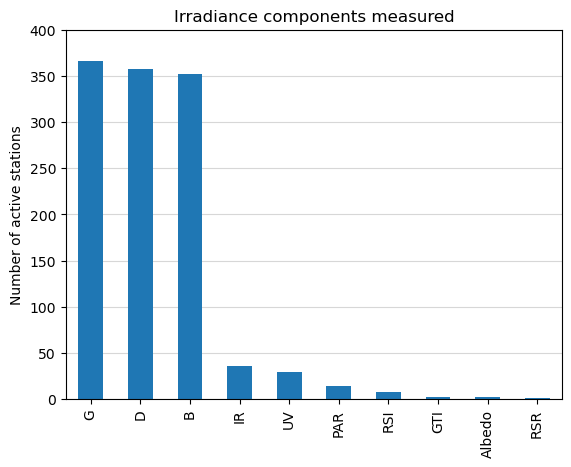

In [74]:
components = dfa['Components'].str.split(';', expand=True).stack().value_counts()

fig, axes = plt.subplots()
components.plot.bar(zorder=2)
axes.set_yticks(np.arange(0,components[0]+50,50))
axes.grid(alpha=0.5, which='both', axis='y', zorder=-1)
axes.set_ylabel('Number of active stations')
axes.set_title('Irradiance components measured');